<a href="https://colab.research.google.com/github/sangithajk/Hackathon/blob/master/Credit_score_RF_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("/content/drive/My Drive/CreditScore_train.csv")
test = pd.read_csv("/content/drive/My Drive/CreditScore_test.csv")

In [0]:
train["source"] = "train"
test["source"] = "test"
df = pd.concat([train,test])

In [0]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,2,4,4,9,19,5,14,8,5,6,2,3,2,1,1,1,1,6,1,5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0.1943,484289,0,NaN,0,0,0,484289,0,484289,1,1,1,0,0,1.0,NaN,NaN,NaN,0,346762,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,3,3,7,5,21,5,16,5,3,9,2,3,1,9,1,1,1,3,9,6,0,0,0,0,0,0,0,0,0,0,...,5.5,0.8417,1,1,1,0.2356,125307,0,NaN,0,0,0,125307,0,125307,1,1,1,2,0,1.0,9.0,2.0,5.5,17318,124634,0.8417,0,NaN,17318,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,1,0,0,6,8,3,5,4,2,7,3,3,2,0,0,0,1,0,0,4,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,0,0,0,0.0308,706,0,NaN,0,0,0,706,0,706,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,0,2,2,0,4,0,4,2,0,0,0,0,0,3,0,0,0,0,0,0,7,0,0,1,4,6,0,0,1,3,...,NaN,NaN,0,0,0,0.3025,619,619,0.8123,0,0,0,0,0,0,1,1,1,0,0,9.0,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,1,2,0,0,5,2,3,2,2,2,1,1,1,3,0,1,1,0,3,2,3,0,1,1,1,3,0,1,1,1,...,2.0,1.0180,1,1,1,0.8402,38837,21424,0.7357,1,1,1,17839,426,17413,1,1,1,1,0,9.0,2.0,2.0,2.0,17413,17413,1.0180,0,NaN,17413,1.0180,1,1,1,0,NaN,0,NaN,485,train


In [0]:
df.shape

(100000, 306)

In [0]:
df.drop_duplicates(inplace=True)

In [0]:
df.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
x006          0
x007          0
x008          0
x009          0
x010          0
x011          0
x012          0
x013          0
x014          0
x015          0
x016          0
x017          0
x018          0
x019          0
x020          0
x021          0
x022          0
x023          0
x024          0
x025          0
x026          0
x027          0
x028          0
x029          0
x030          0
          ...  
x277          0
x278          0
x279          0
x280          0
x281          0
x282          0
x283          0
x284          0
x285          0
x286          0
x287      24821
x288      49756
x289      49756
x290      49756
x291          0
x292          0
x293      51133
x294          0
x295      86533
x296          0
x297      58112
x298          0
x299          0
x300          0
x301          0
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int6

In [0]:
for i in range(306) :
  if df.iloc[:,i].isna().sum() > 50000:
    print(i+1)

    

98
155
162
242
253
255
256
257
259
265
266
267
268
275
293
295
297
302
304


In [0]:
df.drop(columns=['x001','x098','x155','x162','x242','x253','x255','x256','x257','x259','x265','x266','x267','x268','x275','x293','x295','x297','x302','x304'],inplace=True)

In [0]:
#for i in range(286) :
#  print( df.iloc[:,i].isna().sum() )
for i in df.columns:
  if df.loc[:,i].isna().sum() > 0:
    print(i)
     

x002
x003
x004
x005
x041
x044
x045
x057
x058
x148
x222
x223
x234
x235
x237
x238
x239
x272
x287
x288
x289
x290


In [0]:
for i in df.columns:
  if i not in [ 'source'] :
    df[i].fillna(df[i].median(),inplace=True)

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [0]:
train_final = df[df.source=="train"]
test_final = df[df.source=="test"]

In [0]:
x_train = train_final.drop(['y','source'],axis=1)
y_train = train_final['y']


In [0]:
x_test = test_final.drop(['y','source'],axis=1)
y_test = test_final['y']

In [0]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(80000, 284) (80000,) (20000, 284) (20000,)


In [0]:
def mape_find(y_true,y_predict):
    y_true, y_predict = np.array(y_true) , np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict)/y_true))*100



In [0]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn import metrics

forest = RandomForestRegressor(n_jobs=-1,n_estimators=20, 
                                       min_samples_leaf=25, 
                                       max_features=0.3).fit(x_train, y_train)

forest_train_predict = forest.predict(x_train)
forest_test_predict = forest.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,forest_train_predict))
print("MAPE value of rf test:",mape_find(y_test,forest_test_predict))
print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,forest_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,forest_test_predict)))



MAPE value of rf train: 3.3775904212201584
MAPE value of rf test: 3.747982915393442
RMSE value of rf train: 27.470532816432996
RMSE value of rf test: 30.543371249375657


In [0]:

#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [0]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=99, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 68.9min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=0.3,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=25,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=20, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=None, ve

In [0]:
cvres2 = rf_random.cv_results_

In [0]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=23,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=25, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
# best combination of parameters of random search
rf_random.best_params_

{'max_depth': 23,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 200}

In [0]:
#this is the RMSE
random_best= rf_random.best_estimator_.predict(x_train)
final_mse = metrics.mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 27.22


In [0]:
#Feature importance

# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(df.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df1 = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df1['importance'])
feature= list(df1['feature'])

#see df
print(df1)

       importance feature
0    5.453470e-01    x043
1    9.719587e-02    x057
2    8.711412e-02    x075
3    7.140911e-02    x274
4    2.605964e-02    x281
5    1.576156e-02    x235
6    1.114798e-02    x276
7    1.113342e-02    x099
8    1.039640e-02    x005
9    8.446241e-03    x055
10   7.030282e-03    x272
11   6.510164e-03    x044
12   5.553967e-03    x014
13   5.084203e-03    x006
14   4.309855e-03    x236
15   4.254989e-03    x240
16   4.099603e-03    x181
17   3.995146e-03    x234
18   3.860200e-03    x245
19   3.441654e-03    x036
20   3.262320e-03    x041
21   3.244943e-03    x243
22   2.535135e-03    x287
23   2.489102e-03    x233
24   2.478420e-03    x031
25   2.332368e-03    x056
26   2.111475e-03    x239
27   2.059703e-03    x076
28   1.985540e-03    x238
29   1.837648e-03    x193
..            ...     ...
254  2.937839e-06    x136
255  2.833730e-06    x164
256  2.714479e-06    x152
257  2.300899e-06    x140
258  2.243641e-06    x184
259  2.057793e-06    x126
260  1.89146

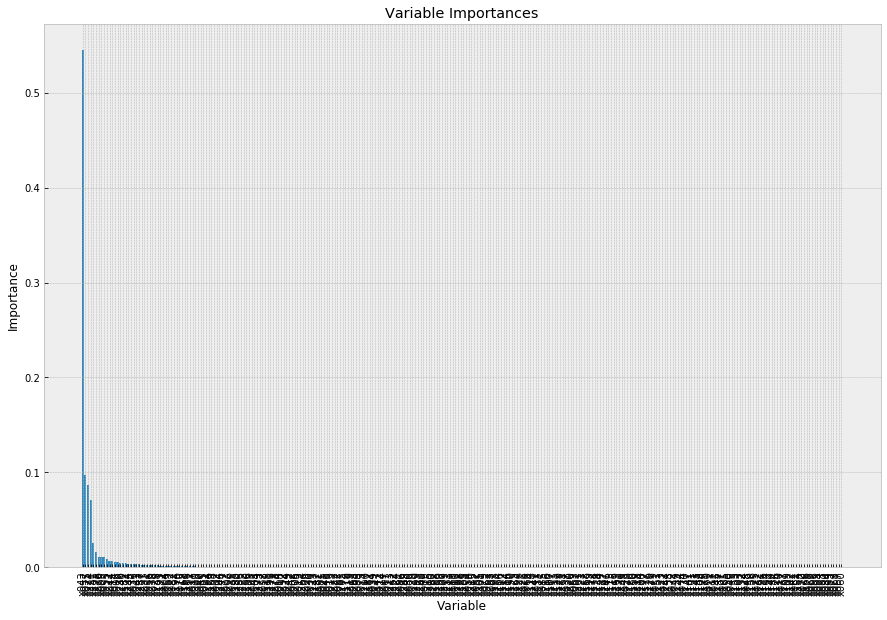

In [0]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [0]:
x_train.shape

(80000, 284)

In [0]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()

model.add(Dense(20, input_dim=284))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(30))
model.add(Activation('elu'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 150, verbose = 1)

Train on 56000 samples, validate on 24000 samples
Epoch 1/150
56000/56000 [==============================] - 4s 72us/step - loss: 566092.8940 - mean_squared_error: 566092.8940 - val_loss: 2281303.5164 - val_mean_squared_error: 2281303.5164
Epoch 2/150
56000/56000 [==============================] - 4s 66us/step - loss: 168973.5255 - mean_squared_error: 168973.5255 - val_loss: 87225.8562 - val_mean_squared_error: 87225.8562
Epoch 3/150
56000/56000 [==============================] - 4s 65us/step - loss: 107618.6562 - mean_squared_error: 107618.6562 - val_loss: 80795.3949 - val_mean_squared_error: 80795.3949
Epoch 4/150
56000/56000 [==============================] - 4s 65us/step - loss: 77536.4990 - mean_squared_error: 77536.4990 - val_loss: 49101.5241 - val_mean_squared_error: 49101.5241
Epoch 5/150
56000/56000 [==============================] - 4s 65us/step - loss: 54427.9612 - mean_squared_error: 54427.9612 - val_loss: 34961.1671 - val_mean_squared_error: 34961.1671
Epoch 6/150
56000/56

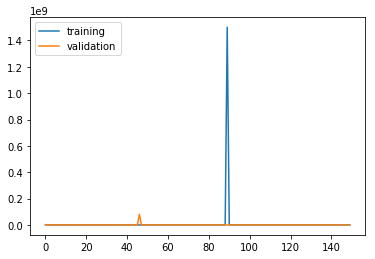

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                5700      
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               2100      
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)               

In [0]:
#deep_train_predict = model.predict(x_train)
deep_test_predict = model.predict(x_test)
#print("MAPE value of DeepL train:",mape_find(y_train,deep_train_predict))
#print("MAPE value of DeepL test:",mape_find(y_test,deep_test_predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,deep_test_predict)))


RMSE 35.72078602039825
